# Revolutionizing Thyroid Disorder Detection with Machine Learning:

### Objective
*The primary objective of this project is to leverage machine learning techniques to enhance the accuracy and efficiency of thyroid disorder detection. By employing advanced algorithms and data analytics, the goal is to develop a robust and reliable system capable of analyzing diverse medical data, including thyroid function tests. The key focus is on creating a machine learning-based solution that can assist healthcare professionals in early and accurate identification of thyroid disorders, leading to timely interventions and improved patient outcomes.*

### Fueling Innovation: The Thyroid Detection Dataset

This project leverages the rich Thyroid Detection dataset, publicly available on Kaggle and originally obtained from the UCI Machine Learning Repository. This comprehensive dataset boasts 9172 data points, each containing 31 distinct attributes. Essentially, each data point represents a patient's medical profile. These profiles encompass demographic details, past medical history, various lab test results, and the crucial target variable - an indicator of hyperthyroidism. This treasure trove of data serves as the foundation for developing and evaluating powerful machine learning models for detecting thyroid disorder.

### Key Attributes:

1. **Demographic Information:**
   - *Age*: The age of the patient (integer).
   - *Sex*: Gender identification of the patient (string).

2. **Medical History:**
   - *On_thyroxine*: Boolean indicating whether the patient is on thyroxine.
   - *Query_on_thyroxine*: Boolean indicating queries regarding thyroxine usage.
   - *On_antithyroid_meds*: Boolean indicating whether the patient is on antithyroid medications.
   - *Sick*: Boolean indicating whether the patient is sick.
   - *Pregnant*: Boolean indicating whether the patient is pregnant.
   - *Thyroid_surgery*: Boolean indicating whether the patient has undergone thyroid surgery.
   - *I131_treatment*: Boolean indicating whether the patient is undergoing I131 treatment.
   - *Query_hypothyroid*: Boolean indicating the patient's belief of having hypothyroidism.
   - *Query_hyperthyroid*: Boolean indicating the patient's belief of having hyperthyroidism.
   - *Lithium*: Boolean indicating whether the patient uses lithium.
   - *Goitre*: Boolean indicating whether the patient has goitre.
   - *Tumor*: Boolean indicating whether the patient has a tumor.
   - *Hypopituitary*: Float value indicating a condition related to the hyperpituitary gland.
   - *Psych*: Boolean indicating a psychological condition.

3. **Laboratory Test Results:**
   - *TSH_measured*: Boolean indicating whether TSH was measured.
   - *TSH*: Float value representing the TSH level in the blood.
   - *T3_measured*: Boolean indicating whether T3 was measured.
   - *T3*: Float value representing the T3 level in the blood.
   - *TT4_measured*: Boolean indicating whether TT4 was measured.
   - *TT4*: Float value representing the TT4 level in the blood.
   - *T4U_measured*: Boolean indicating whether T4U was measured.
   - *T4U*: Float value representing the T4U level in the blood.
   - *FTI_measured*: Boolean indicating whether FTI was measured.
   - *FTI*: Float value representing the FTI level in the blood.
   - *TBG_measured*: Boolean indicating whether TBG was measured.
   - *TBG*: Float value representing the TBG level in the blood.

4. **Other Attributes:**
   - *Referral_source*: String indicating the source of patient referral.
   - *Target*: String indicating the medical diagnosis of hyperthyroidism.
   - *Patient_id*: String representing a unique identifier for each patient.

In [2]:
# Importing required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.express as px

In [173]:
# Loading the dataset
df = pd.read_csv("thyroidDF.csv")

### Exploration of the Dataset

In [141]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  referral_source target  patient_id  
0 NaN            f NaN            f   NaN            other      -   840801013  
1 NaN            f NaN            f   NaN            other      -   840801014  
2 NaN            f NaN            t  11.0            other      -   840801042  
3 NaN            f NaN            t  26.0            other      -   840803046  
4 NaN            f NaN            t  36.0            other      S   840803047  

[5 rows x 31 columns]

In [142]:
x = df.shape
print(f'No of rows and columns are {x} respectively' )

No of rows and columns are (9172, 31) respectively


In [143]:
# checking for duplicate values
df.duplicated().sum()

0

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

**Data Scrutiny Reveals Missing Values:**

*Our initial exploration reveals inconsistencies in the dataset.  While we have a total of 9172 observations, some columns, like "sex" with 8856 non-null values and "TSH" with 8330 non-null values,  contain missing data.  This indicates that not all data points have values for every variable.  We'll address these missing values in the next section to ensure our analysis is based on a complete dataset.*

In [145]:
# basic summary about numerical variables
df.describe()

age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+08  
75%     128.000000   31.000000  8.607110e+08  
max     881.000000  200.000000  8.701190e+08

***Unearthing Outliers in the Data***

*A closer look at the data reveals the presence of potential outliers. For instance, the "sex" variable has a maximum value of 65526, which is clearly nonsensical in this context. Similar anomalies can be found in other variables, suggesting the presence of outliers that may skew our analysis. We will need to investigate these further to determine the best course of action, such as winsorizing or removing them if necessary.*

In [146]:
# basic summary about categorical variable
df.describe(include = 'O').T

count unique    top  freq
sex                  8865      2      F  6073
on_thyroxine         9172      2      f  7932
query_on_thyroxine   9172      2      f  9019
on_antithyroid_meds  9172      2      f  9056
sick                 9172      2      f  8828
pregnant             9172      2      f  9065
thyroid_surgery      9172      2      f  9038
I131_treatment       9172      2      f  9003
query_hypothyroid    9172      2      f  8542
query_hyperthyroid   9172      2      f  8521
lithium              9172      2      f  9079
goitre               9172      2      f  9088
tumor                9172      2      f  8931
hypopituitary        9172      2      f  9170
psych                9172      2      f  8754
TSH_measured         9172      2      t  8330
T3_measured          9172      2      t  6568
TT4_measured         9172      2      t  8730
T4U_measured         9172      2      t  8363
FTI_measured         9172      2      t  8370
TBG_measured         9172      2      f  8823
referral_source      9172      6  other  5493
target               9172     32      -  6771

### Enhancing Data Quality for Accurate Thyroid Disorder Detection: Data Cleaning

*The Thyroid Detection dataset presented a challenge: missing data points in crucial features like "sex," thyroid hormone levels ("TSH," "T3," "TT4," "T4U," "FTI"), and a binding protein ("TBG"). To tackle this, we employed imputation techniques. For the categorical "sex" feature, we replaced missing values with the most frequent value (mode). For numerical features with missing values, we used the median value. However, due to the significant number of missing entries in "TBG" (almost 97%), we made the decision to remove this column entirely. This data cleaning process resulted in a high-quality dataset ready for robust analysis and machine learning model development. This, in turn, paves the way for the creation of accurate models for detecting thyroid disorders.*

In [147]:
# number of missing values
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [174]:
# As we can see in 'TBG' column, the number of missing value is very high so we remove that specific column.
# also, 'patient_id, is of no use for us so we will remove that as well
df.drop(['TBG','patient_id'], axis = 1, inplace = True)

In [175]:
df.shape

(9172, 29)

In [176]:
# Handeling missing values in T3, T4U, TSH
assign_T3 = np.random.uniform(df['T3'].mean() - df['T3'].std(),df['T3'].mean() + df['T3'].std(),2604)
df['T3'][df['T3'].isnull()] = assign_T3

In [177]:
assign_TSH = np.random.uniform(df['TSH'].mean() - df['TSH'].std(),df['TSH'].mean() + df['TSH'].std(),842)
df['TSH'][df['TSH'].isnull()] = assign_TSH

In [178]:
assign_T4U = np.random.uniform(df['T4U'].mean() - df['T4U'].std(),df['T4U'].mean() + df['T4U'].std(),809)
df['T4U'][df['T4U'].isnull()] = assign_T4U

In [179]:
df.shape

(9172, 29)

In [180]:
df.dropna(inplace = True)

In [155]:
x = df.shape
print(f'Now the number of rows and columns afer remocing the null values is: {x} respectively')

Now the number of rows and columns afer remocing the null values is: (8089, 29) respectively


### Summary after handeling missing values

In [156]:
df.describe()

age          TSH           T3          TT4          T4U  \
count   8089.000000  8089.000000  8089.000000  8089.000000  8089.000000   
mean      77.013722     5.169085     1.960771   108.735240     0.977453   
std     1260.696538    23.725459     0.798427    37.548322     0.197699   
min        1.000000   -18.963469     0.050000     2.000000     0.170000   
25%       37.000000     0.400000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.800000     2.326360   126.000000     1.060000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI  
count  8089.000000  
mean    112.841815  
std      37.270701  
min       1.400000  
25%      93.000000  
50%     109.000000  
75%     128.000000  
max     642.000000

In [157]:
df.describe(include = 'O').T

count unique    top  freq
sex                  8089      2      F  5496
on_thyroxine         8089      2      f  6942
query_on_thyroxine   8089      2      f  7940
on_antithyroid_meds  8089      2      f  7984
sick                 8089      2      f  7781
pregnant             8089      2      f  7989
thyroid_surgery      8089      2      f  7967
I131_treatment       8089      2      f  7935
query_hypothyroid    8089      2      f  7531
query_hyperthyroid   8089      2      f  7528
lithium              8089      2      f  8000
goitre               8089      2      f  8009
tumor                8089      2      f  7893
hypopituitary        8089      2      f  8087
psych                8089      2      f  7694
TSH_measured         8089      2      t  7655
T3_measured          8089      2      t  5931
TT4_measured         8089      1      t  8089
T4U_measured         8089      2      t  8086
FTI_measured         8089      1      t  8089
TBG_measured         8089      2      f  8059
referral_source      8089      6  other  4625
target               8089     30      -  5957

### Handeling Outliers

In [1]:
# Handeling outliers in numerical valiables
df = df[df['TSH'] < (df['TSH'].mean() + 3*df['TSH'].std())]
df = df[df['T4U'] < (df['T4U'].mean() + 3*df['T4U'].std())]
df = df[df['T3'] < (df['T3'].mean() + 3*df['T3'].std())]
df = df[df['TT4'] < (df['TT4'].mean() + 3*df['TT4'].std())]
df = df[df['FTI'] < (df['FTI'].mean() + 3*df['FTI'].std())]
df = df[df['age'] < 100]

NameError: name 'df' is not defined

In [159]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'target'],
      dtype='object')

In [160]:
df['target'].unique()

array(['F', '-', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J', 'O',
       'LJ', 'H|K', 'GK', 'C|I', 'A', 'KJ', 'P', 'FK', 'MK', 'GI', 'B',
       'C', 'GKJ', 'OI', 'E'], dtype=object)

In [182]:
map = {'-':"Negative",'A':'Hyperthyroid','AK':"Hyperthyroid", 'B':"Hyperthyroid", 
           'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid",
           'D|R':"Hyperthyroid", 'E': "Hypothyroid",'F': "Hypothyroid", 
           'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", 
           "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }

In [183]:
df['target'] = df['target'].map(map)
df.dropna(subset = ['target'],inplace = True)

In [184]:
df.shape

(6498, 29)

In [164]:
df['target'].unique()

array(['Hypothyroid', 'Negative', 'Hyperthyroid'], dtype=object)

In [166]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
18   63   F            t                  f                   f    t        f   
19   36   F            f                  f                   f    f        f   
20   40   F            f                  t                   f    f        f   
21   40   F            f                  f                   f    f        f   
22   40   F            f                  f                   f    f        f   

   thyroid_surgery I131_treatment query_hypothyroid  ...        T3  \
18               f              f                 f  ...  2.814775   
19               f              f                 t  ...  2.400000   
20               f              f                 f  ...  2.529164   
21               f              f                 f  ...  2.300000   
22               f              f                 f  ...  2.100000   

   TT4_measured    TT4 T4U_measured   T4U FTI_measured    FTI  TBG_measured  \
18            t   48.0            t  1.02            t   47.0             f   
19            t   90.0            t  1.06            t   85.0             f   
20            t   79.0            t  0.94            t   84.0             f   
21            t  104.0            t  1.08            t   96.0             f   
22            t   88.0            t  0.84            t  105.0             f   

   referral_source       target  
18           other  Hypothyroid  
19           other     Negative  
20           other     Negative  
21           other     Negative  
22           other     Negative  

[5 rows x 29 columns]

### Data Visualisation

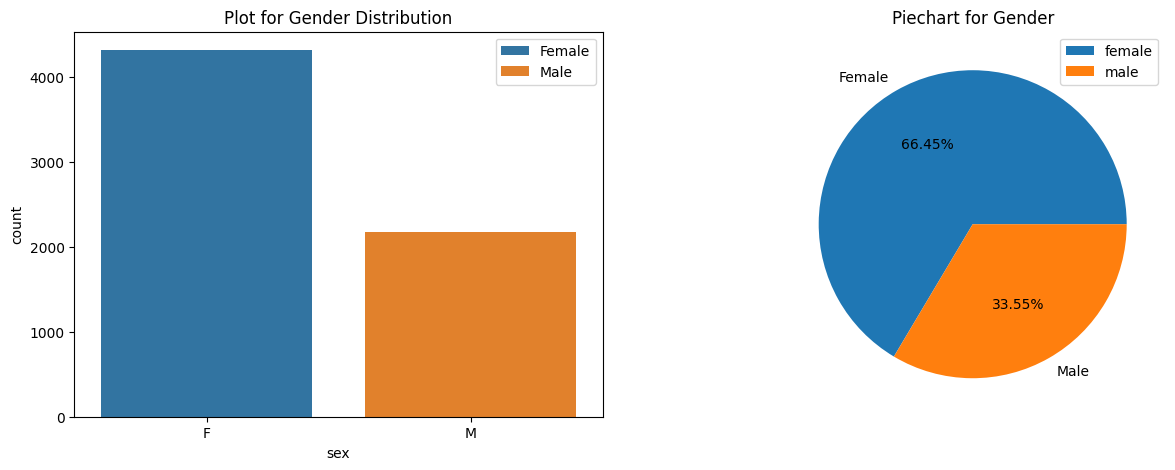

In [63]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'sex',hue = 'sex', data = df)
plt.title('Plot for Gender Distribution')
plt.legend(['Female','Male'])

plt.subplot(1,2,2)
female, male = df['sex'].value_counts()
x = [female, male]
plt.pie(x = x,labels = ['Female', 'Male'], autopct = '%.2f%%')
plt.title('Piechart for Gender')
plt.legend(['female', 'male'])

*The provided histogram and pie chart visually depict the distribution of data where females comprise a significantly larger segment at 66.42%, compared to males who make up the remaining 33.58%. This visualization clearly indicates that the dataset has a higher proportion of females in relation to males.*

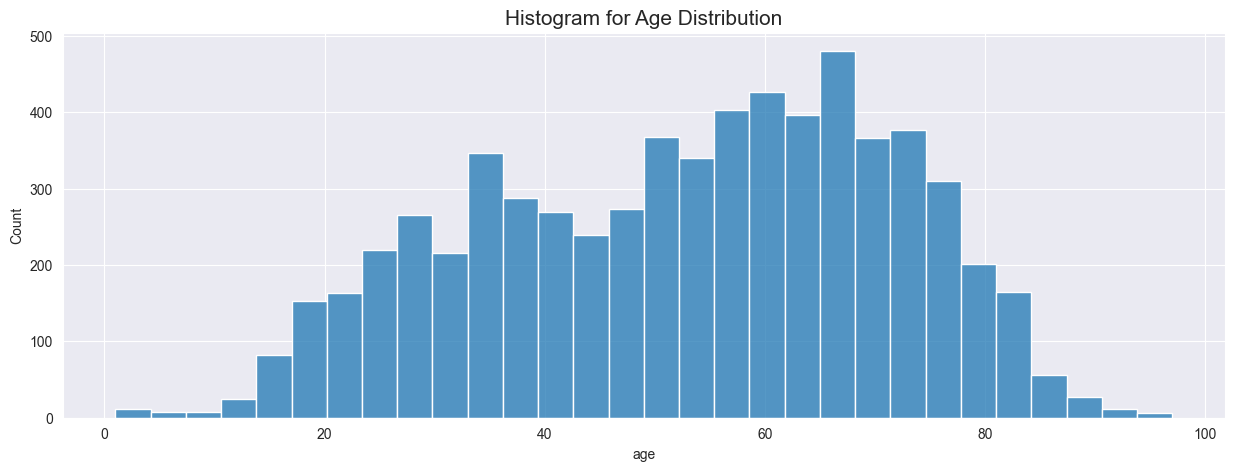

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.histplot(df['age'])
plt.title('Histogram for Age Distribution', size = 15)
plt.show()

*The histogram portrays a clustering of individuals between the ages of 20 and 80. This age group reaches its peak density around 58 to 62 years old.  Conversely, there's a noticeable decline in the frequency of individuals in the younger age range, from 1 to 15 years old.  The x-axis represents these age groups, while the y-axis corresponds to the corresponding number of people.  Examining the overall distribution, we can see gradual decrease in the number of individuals in both younger and older age categories.*

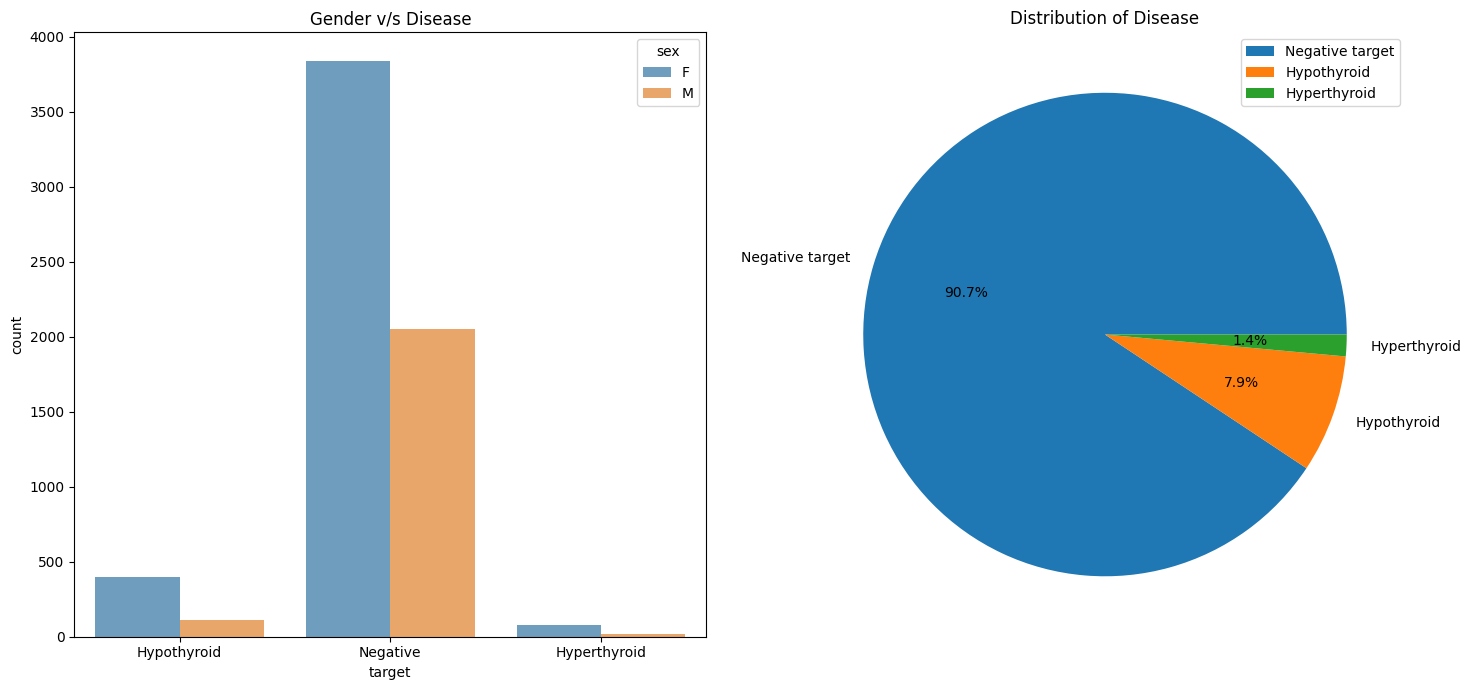

In [138]:
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.countplot(x = 'target',data = df , hue = 'sex', alpha = 0.7)
plt.title('Gender v/s Disease')

plt.subplot(1,2,2)
x,y,z = df['target'].value_counts()
X = [x,y,z]
plt.pie(x = X, labels = ['Negative target','Hypothyroid','Hyperthyroid'], autopct = '%.1f%%')
plt.legend(['Negative target','Hypothyroid','Hyperthyroid'])
plt.title('Distribution of Disease')
plt.tight_layout()

- The histogram shows disease types by gender. Females appear to have a higher rate overall. Hypothyroidism is most common, followed by Hyperthyroidism. Thankfully, the "Negative" category dominates, indicating most individuals are healthy.

- The pie chart confirms this. "Negative" makes up a significant 90.6%, with Hyperthyroidism and Hypothyroidism at 7.86% and 1.54% respectively.

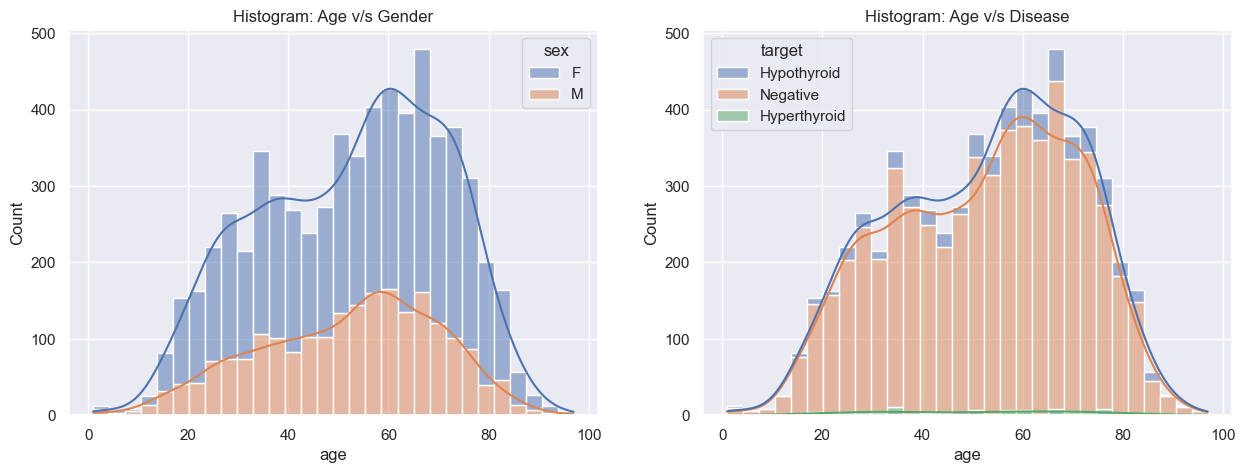

<Figure size 640x480 with 0 Axes>

In [146]:
plt.figure(figsize = (15,5))
sns.set(style='darkgrid')

plt.subplot(1,2,1)
sns.histplot(x = 'age', data = df, hue = 'sex', multiple = 'stack', kde = True, alpha = 0.5)
plt.title('Histogram: Age v/s Gender')


plt.subplot(1,2,2)
sns.histplot(x = 'age', data = df, hue = 'target', kde = True, multiple = 'stack')
plt.title('Histogram: Age v/s Disease')
plt.show()
plt.tight_layout()

**Age and Gender Distribution (Bar Chart):**

*The 20-30 age group has roughly twice as many females (200) as males (100). This trend of more females holds true across most age groups, except for 0-10. Interestingly, the gap between genders narrows in older age groups.*

**Target Distribution by Age (Histogram):**

*The histogram reveals a pattern in target distribution across age groups. The blue target group is more prominent in younger ages (20-40), while the green target group becomes more frequent in older ages (50-70).*

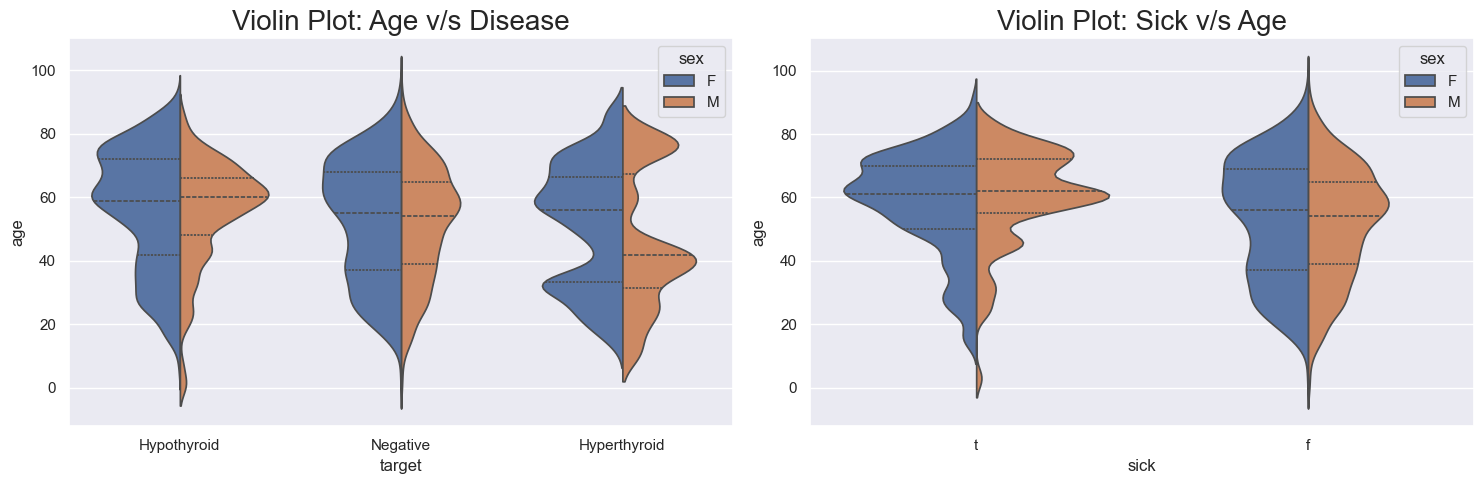

In [147]:
plt.figure(figsize = (15,5))
sns.set(style='darkgrid')

plt.subplot(1,2,1)
sns.violinplot(x = 'target',y = 'age', hue = 'sex', data = df, split = True, bw = .2, inner = 'quart')
plt.title('Violin Plot: Age v/s Disease',  size = 20)

plt.subplot(1,2,2)
sns.violinplot(x = 'sick', y = 'age', hue = 'sex', data = df, split = True, inner = 'quart',bw = .2 )
plt.title('Violin Plot: Sick v/s Age' ,size= 20)

plt.tight_layout()

**Gender and Hypothyroidism (Violin Plot):**

*The violin plot for females with Hypothyroidism is wider and has longer tails compared to males. This suggests more females have the condition, and the severity varies more for females.*

**Age and Disease Distribution (Violin Plot):**

*The "Negative" category for the 20-30 age group has a wider body compared to the 60-70 age group. This indicates a larger number of young individuals free of disease. Overall, the violin plot suggests the distribution of diseases across age groups differs.*

Text(0, 0.5, 'frequency')

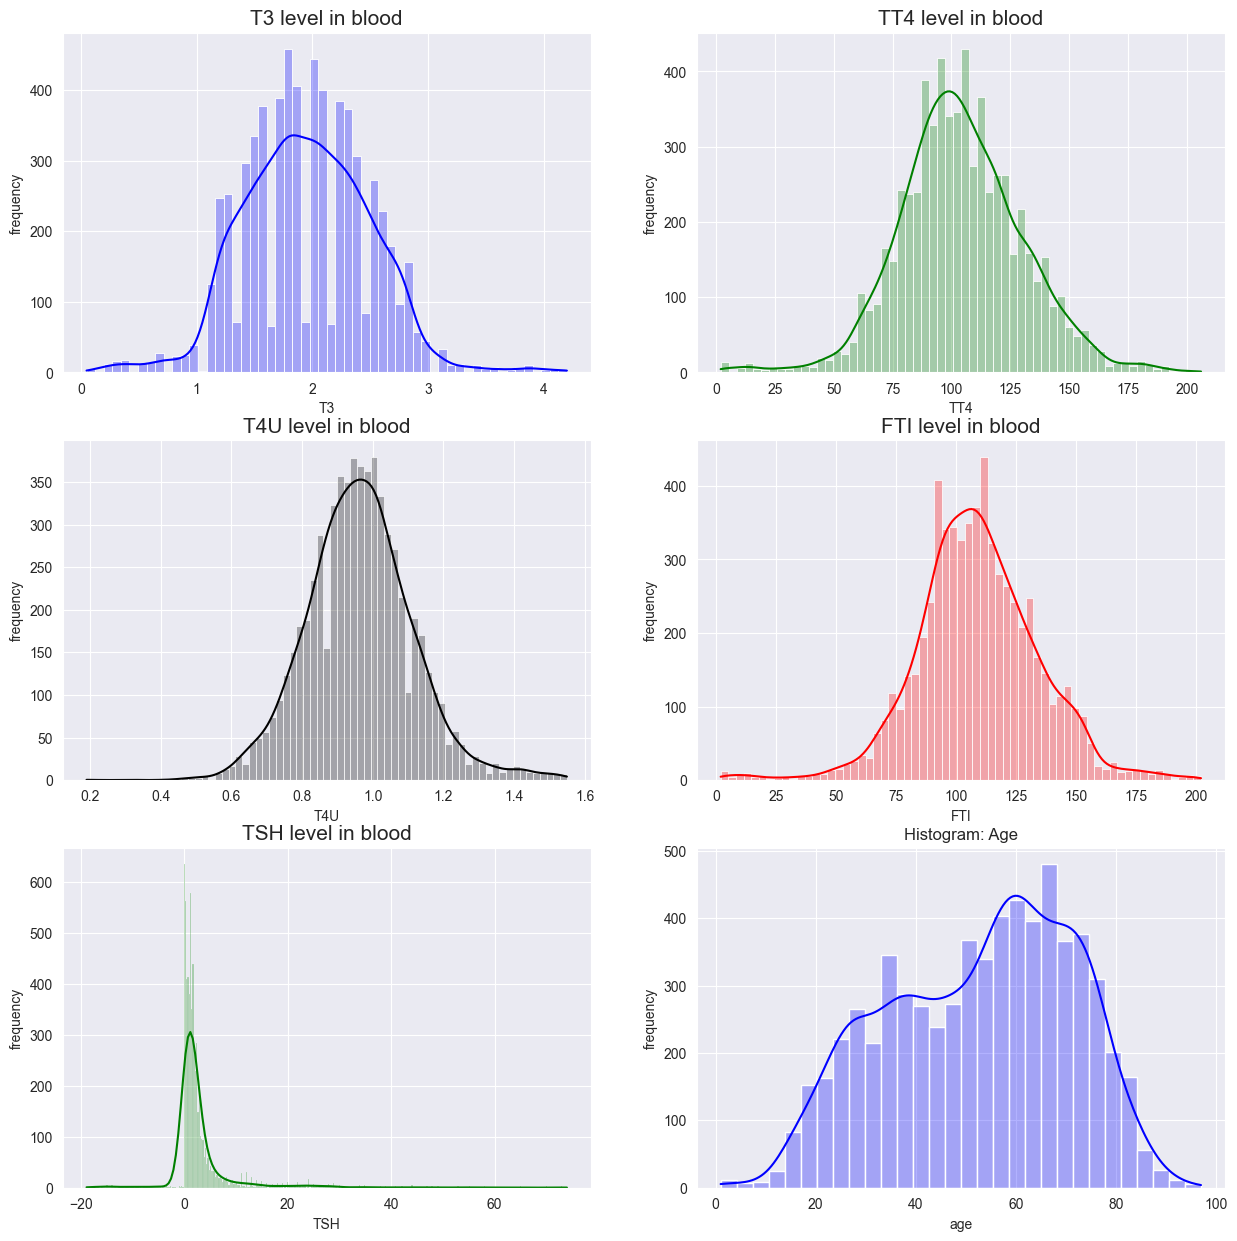

In [75]:
columns_plot = ['T3','TT4','T4U','FTI','TSH']
colours = ['blue','green', 'black','red','green']
plt.figure(figsize = (15,15))

for i, (column,color) in enumerate(zip(columns_plot, colours), start = 1):
    plt.subplot(3,2,i)
    sns.histplot(x = column, data = df, color  = color, kde = True, alpha = 0.3)
    plt.title(f'{column} level in blood', size = 15)
    plt.ylabel('frequency')

plt.subplot(3,2,6)
sns.histplot(x = 'age', data = df, color = 'blue', kde = True,alpha = 0.3)
plt.title('Histogram: Age')
plt.ylabel('frequency')

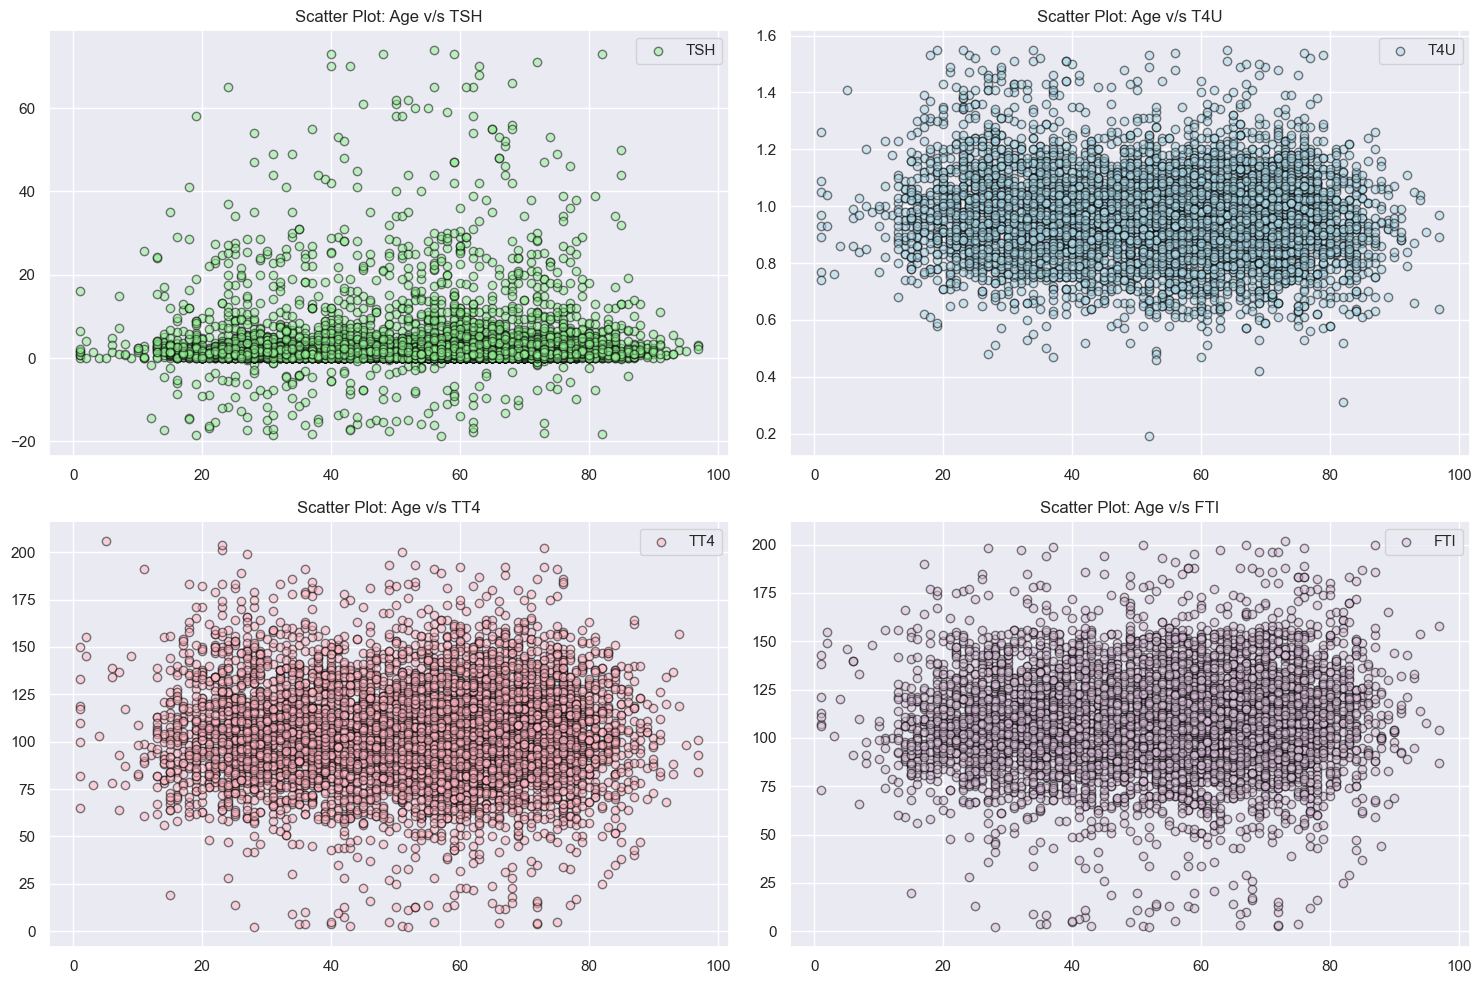

In [178]:
column_plot = ['TSH','T4U','TT4','FTI']
colours = ['lightgreen', 'lightblue', 'lightpink', 'thistle']
plt.figure(figsize = (15,10))

for i, (column, color) in enumerate(zip(column_plot, colours), start = 1):
    plt.subplot(2,2,i)
    plt.scatter(x = 'age', y = column, data = df, c = color, alpha = 0.5, linewidth = 1, edgecolor ='black')
    plt.title(f'Scatter Plot: Age v/s {column}')
    plt.legend()

plt.tight_layout()
plt.show()

**AGE v/s TSH**

*There's a weak positive correlation between age and TSH levels. This means older people may have slightly higher TSH on average, but there's a lot of variation.*

**AGE v/s T4U**

*A weak negative correlation exists between age and T4U levels. This means older adults may have slightly lower T4U on average, but there's still a lot of variation.*


**AGE v/s TT4**

*Similar to T4U, a weak negative correlation exists between age and TT4 levels. While older individuals may have slightly lower TT4 on average, there's still significant variation.*

**AGE v/s FTI**

*FTI levels show no clear correlation with age. There's no consistent pattern in how FTI levels change as people get older.*

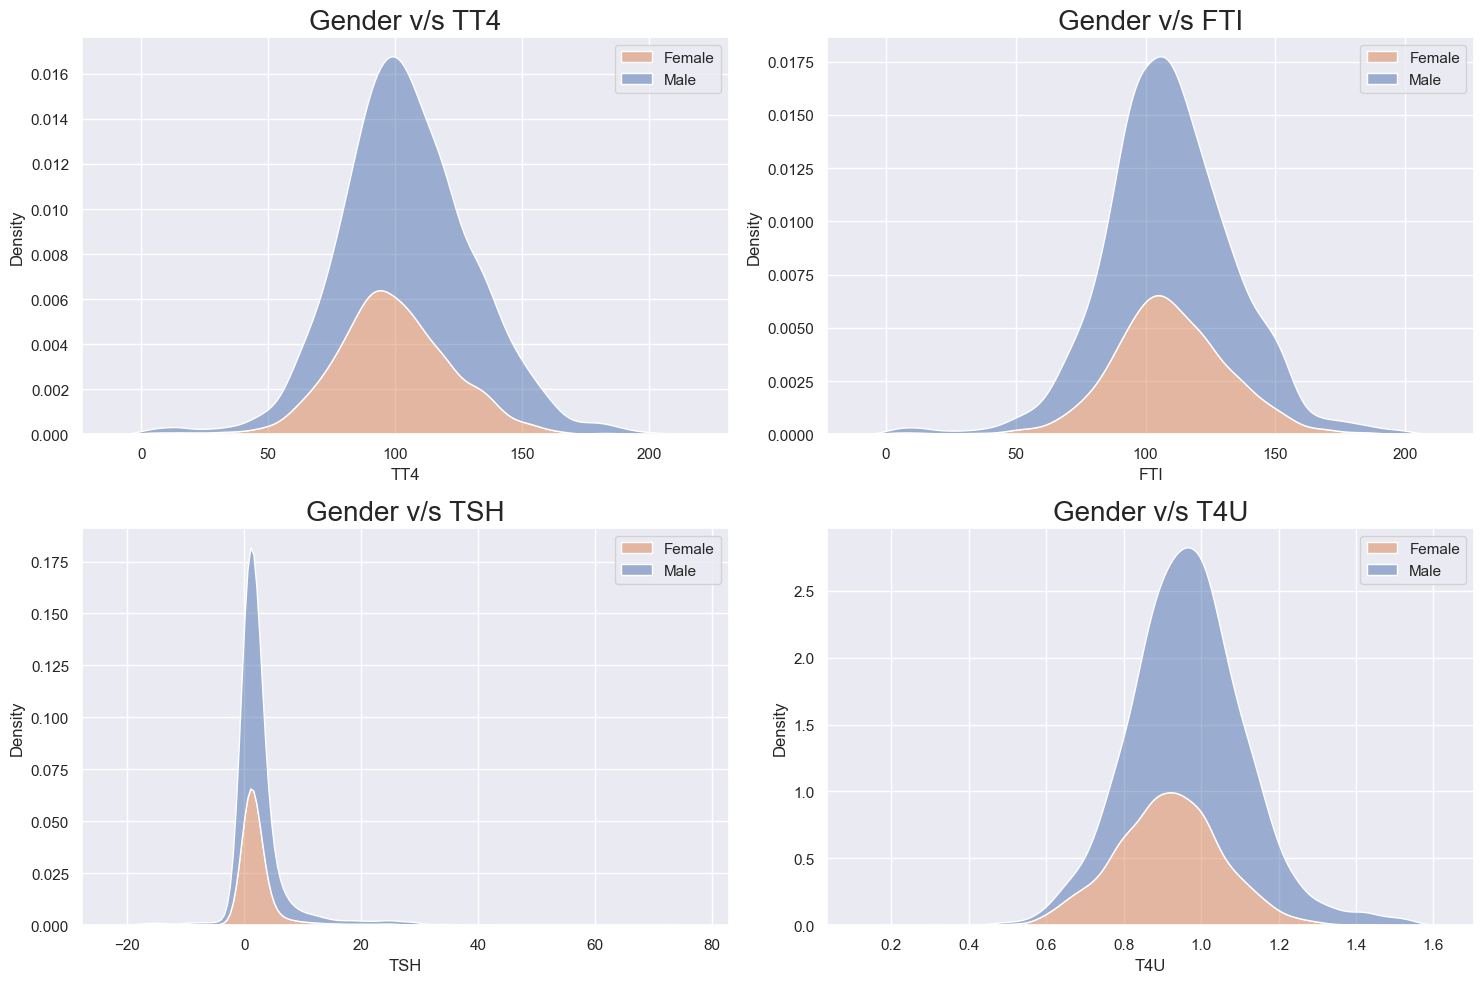

In [184]:
plt.figure(figsize = (15,10))
columns_plot = ['TT4', 'FTI','TSH', 'T4U']
for i ,column in enumerate(columns_plot, start = 1):
    plt.subplot(2,2,i)
    sns.kdeplot(x = column , data = df, hue = 'sex', multiple = 'stack', fill = True, alpha = 0.5)
    plt.title(f'Gender v/s {column}' , size = 20)
    plt.legend(['Female', 'Male'])

plt.tight_layout()
plt.show()


**Sex and Hormone Levels: A Density Distribution Analysis**

*These density plots explore the distribution of thyroid hormone levels (TSH, FTI, T4U, TT4) across genders. The x-axis represents the hormone level, and the y-axis shows the density (concentration) for each value. Each chart is divided by color, with blue representing males and pink representing females.  A consistent trend emerges: females generally have higher densities for all four hormones compared to males. This suggests that females, on average, may have slightly higher levels of these thyroid hormones.*

In [19]:
df['pregnant'].value_counts()

pregnant
f    6467
t      31
Name: count, dtype: int64

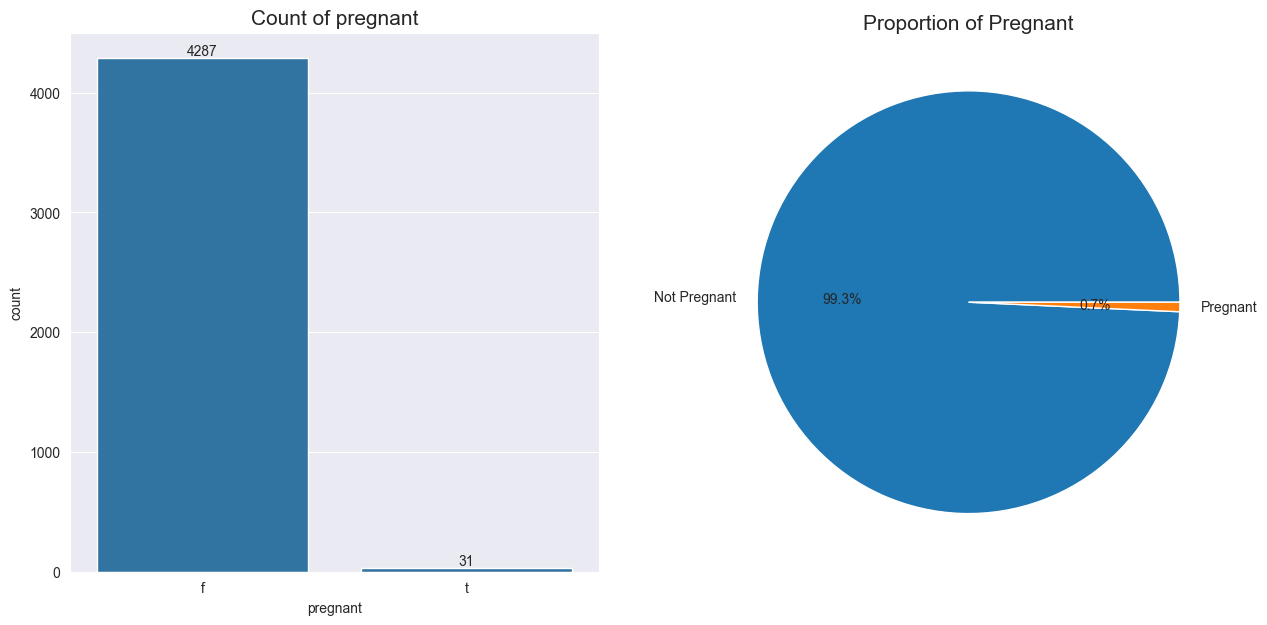

In [60]:
sns.set_style('darkgrid')
female_df = df[df['sex'] == 'F']
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
ax = sns.countplot(x = 'pregnant', data = female_df)
plt.title('Count of pregnant', size = 15)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1,2,2)
not_pregnant, pregnant = female_df['pregnant'].value_counts()
pregnant_count = [not_pregnant, pregnant]
plt.pie(x = pregnant_count, labels = ['Not Pregnant', 'Pregnant'], autopct = '%.1f%%')
plt.title('Proportion of Pregnant', size = 15)

plt.show()

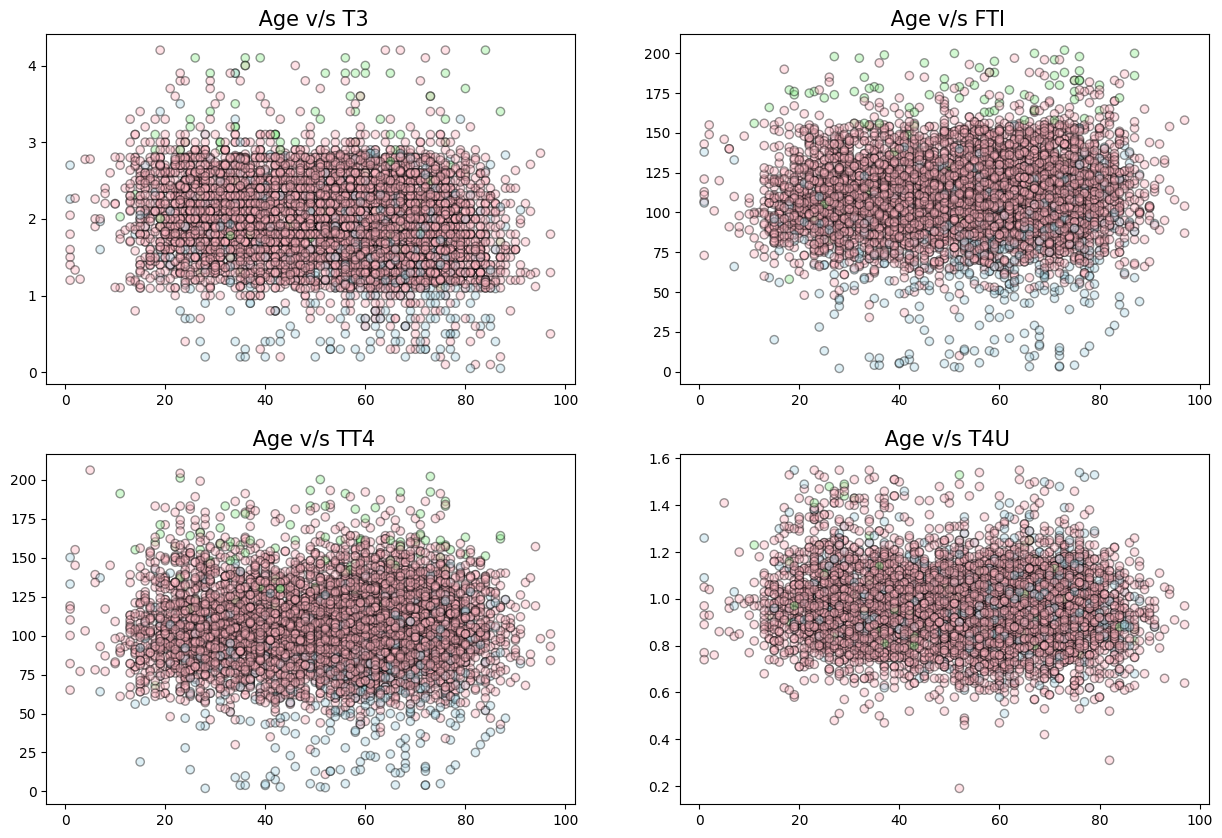

In [56]:
color_categories = {'Negative': 'lightpink','Hypothyroid': 'lightblue', 'Hyperthyroid': 'lightgreen'}
color = [color_categories[cat] for cat in df['target']]
column_plot = ['T3', 'FTI', 'TT4','T4U']
plt.figure(figsize = (15,10))
for i , column in enumerate(column_plot, start = 1):
    plt.subplot(2,2,i)
    plt.scatter(data = df, x='age', y=column, c = color, alpha = 0.4, edgecolor = 'black' )
    plt.title(f' Age v/s {column}', size = 15)
    


#fig1.show()

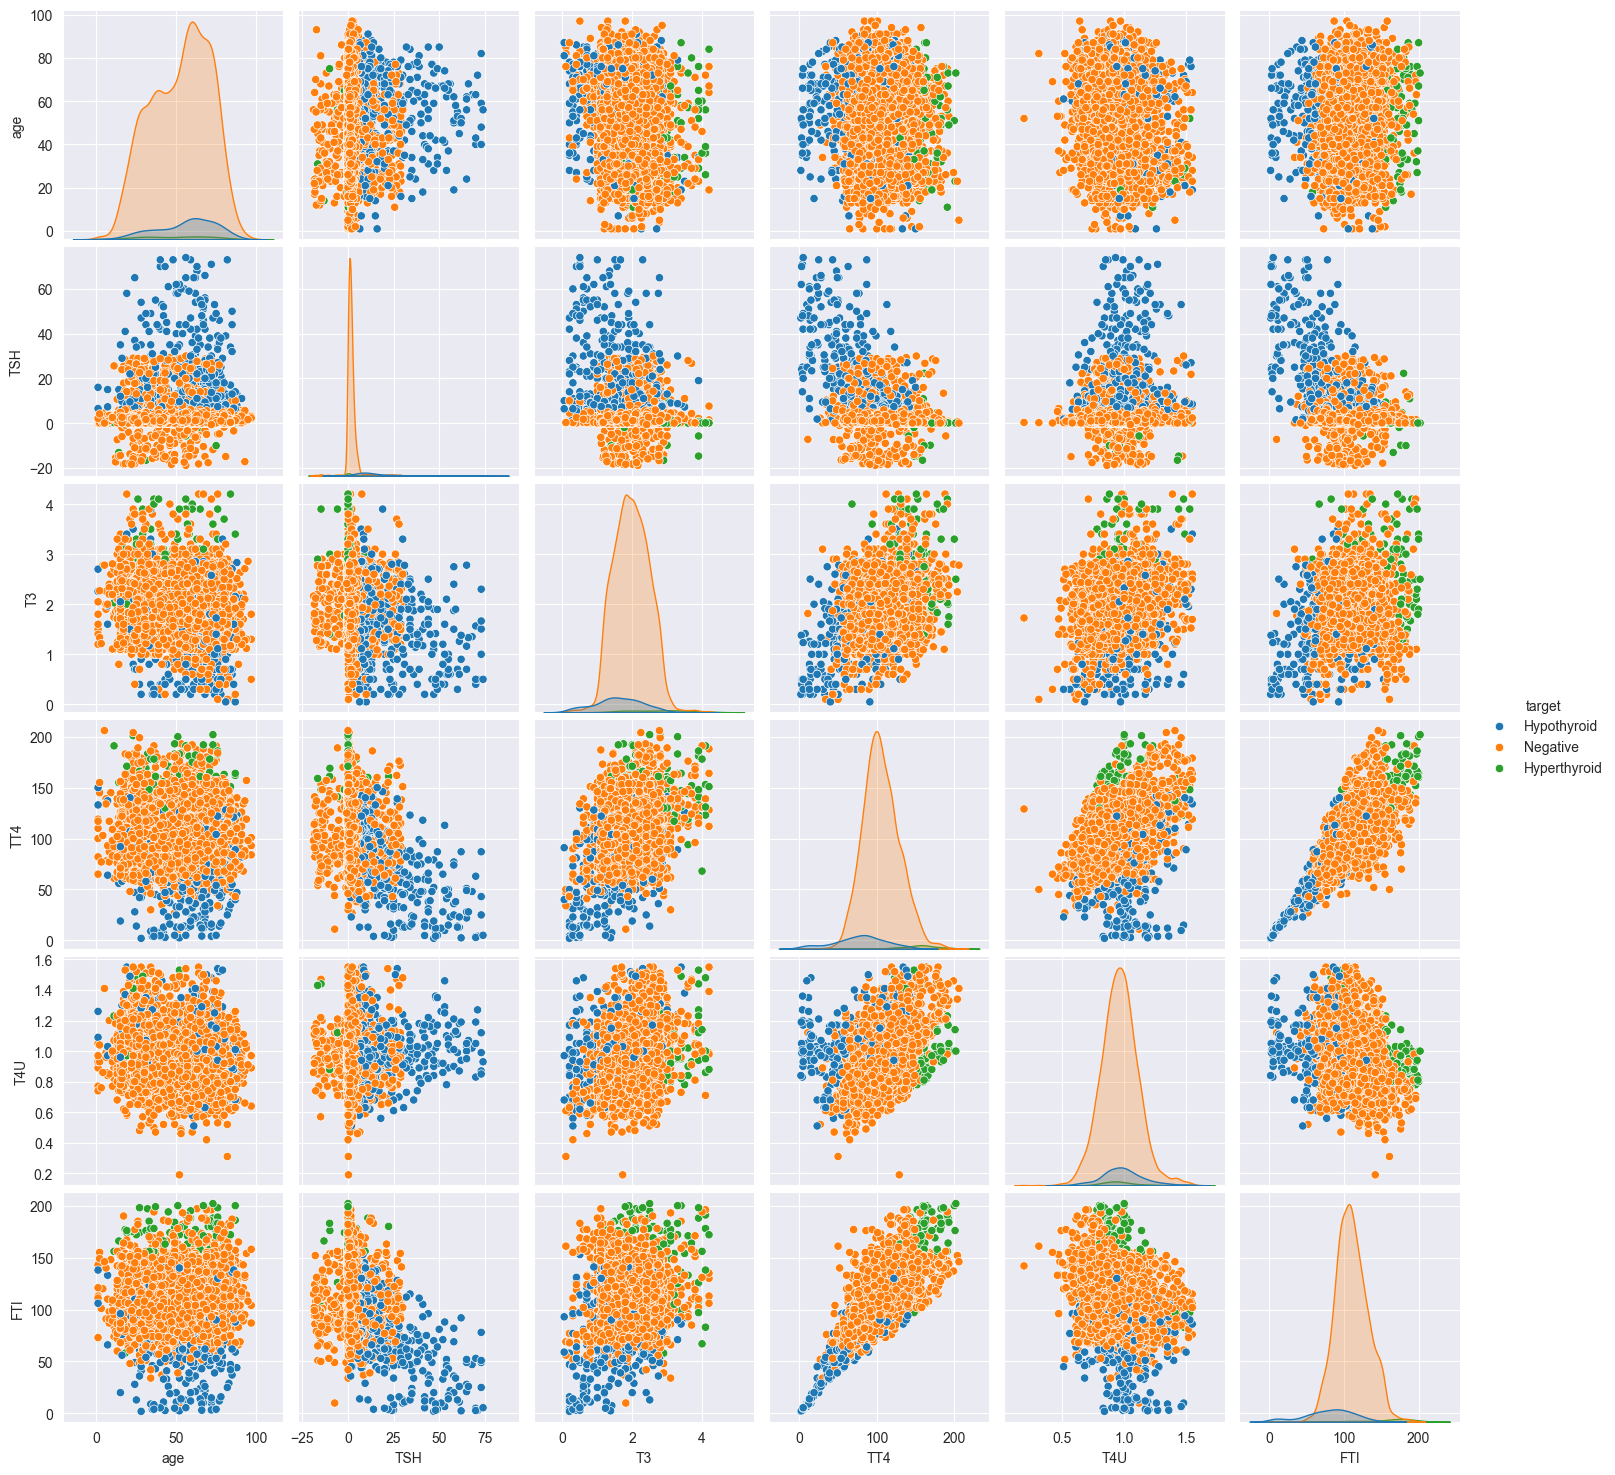

In [59]:
sns.set_style('darkgrid')
des_columns = df.select_dtypes(include = 'number').columns.tolist()+['target']
sns.pairplot(df[des_columns] , hue = 'target')

Text(0.5, 1.0, 'Correlation b/w numeric variables')

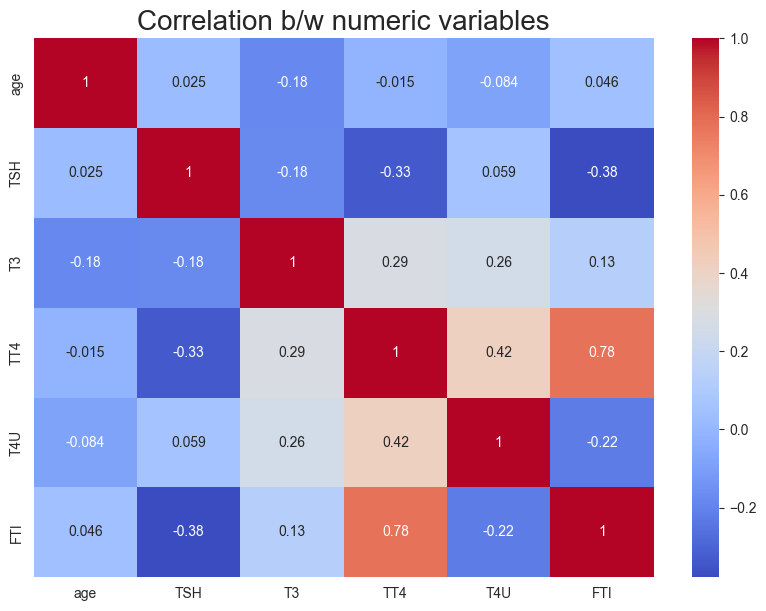

In [68]:
plt.figure(figsize = (10,7))
sns.heatmap(df.select_dtypes(include = 'number').corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation b/w numeric variables', size = 20)

**Thyroid Hormone Correlations:**

*TSH plays a central role. It has a strong negative correlation with T3, TT4, T4U, and FTI. In simpler terms, high TSH indicates potentially low levels of other thyroid hormones, and vice versa. This relationship makes sense because TSH stimulates the production of T3 and T4 by the thyroid gland.*


*T3 levels are positively linked to other hormones. A strong positive correlation exists between T3 and TT4/T4U, and a moderate positive correlation with FTI. This suggests that when T3 is high, these other hormones tend to be higher as well.*


*The remaining hormones (TT4, T4U, and FTI) also show positive correlations with each other, indicating that they often move in tandem.*

**Age and Hormone Levels:**

*Age exhibits weak correlations with thyroid hormones. It has a slightly negative effect on TSH and T3 (meaning they decrease with age), while showing a slightly positive influence on TT4, T4U, and FTI (meaning they increase with age).*

Text(0.5, 1.0, 'Correlation')

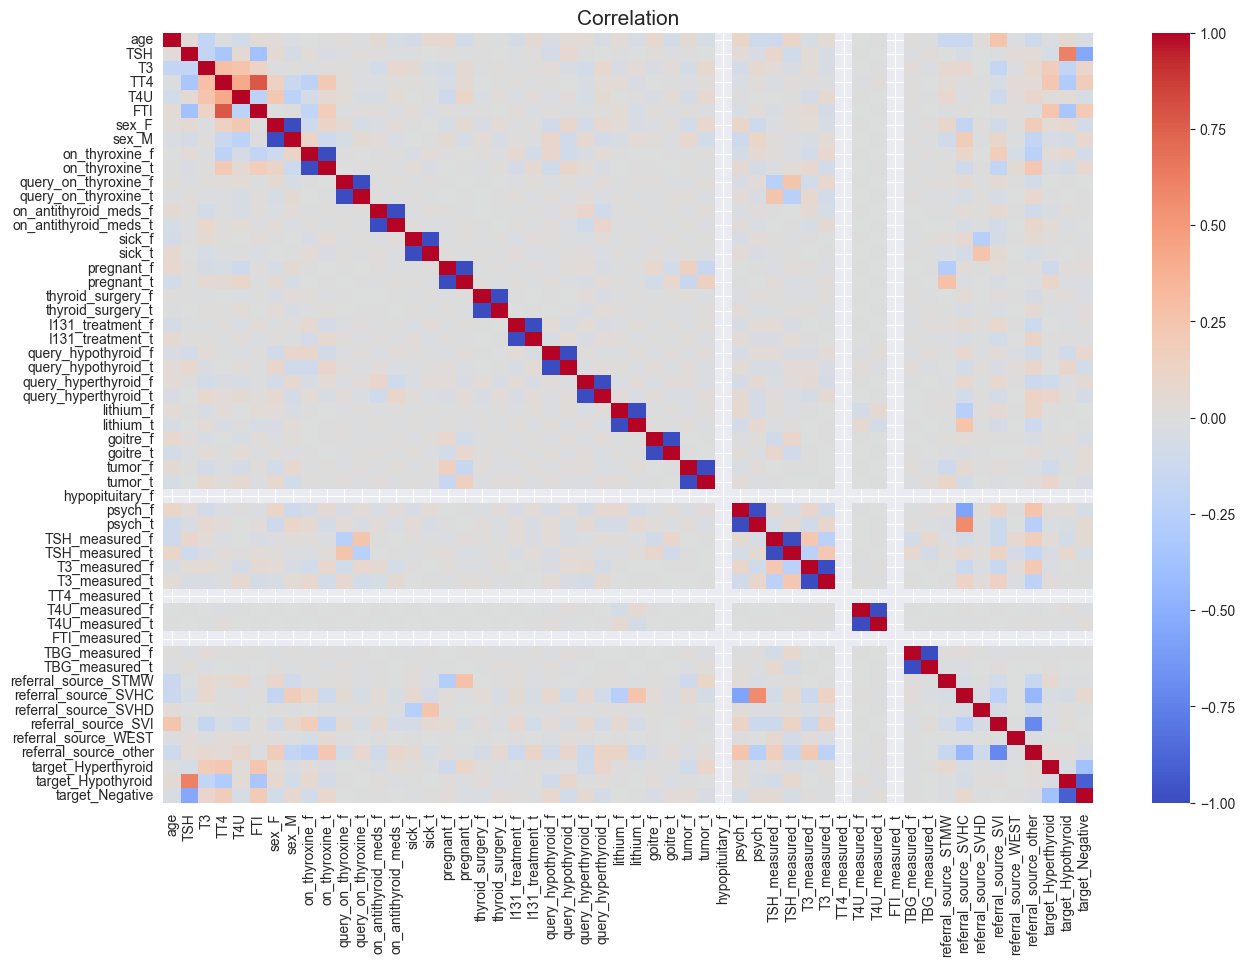

In [73]:
plt.figure(figsize = (15,10))
encoded_data = pd.get_dummies(df)
correlation = encoded_data.corr()
sns.heatmap(correlation , annot = False, cmap = 'coolwarm')
plt.title('Correlation',size = 15)

**Factors Influencing Thyroid Hormone Levels:**

**Age**: *Age has a subtle influence. T3 and T4U levels tend to decrease slightly with age, while TT4 and FTI may increase slightly.*

**Sex**: *Females generally have lower TSH and higher FT4 levels compared to males.*

**Thyroid Medication**: *As expected, medication use impacts hormone levels. Thyroxine therapy suppresses TSH and increases T3/FT4, while antithyroid medication does the opposite.*

**Medical Conditions**: *Certain medical conditions can also play a role. Pregnancy is linked to higher T4 levels, while hypothyroidism shows lower T4 and higher TSH levels.*

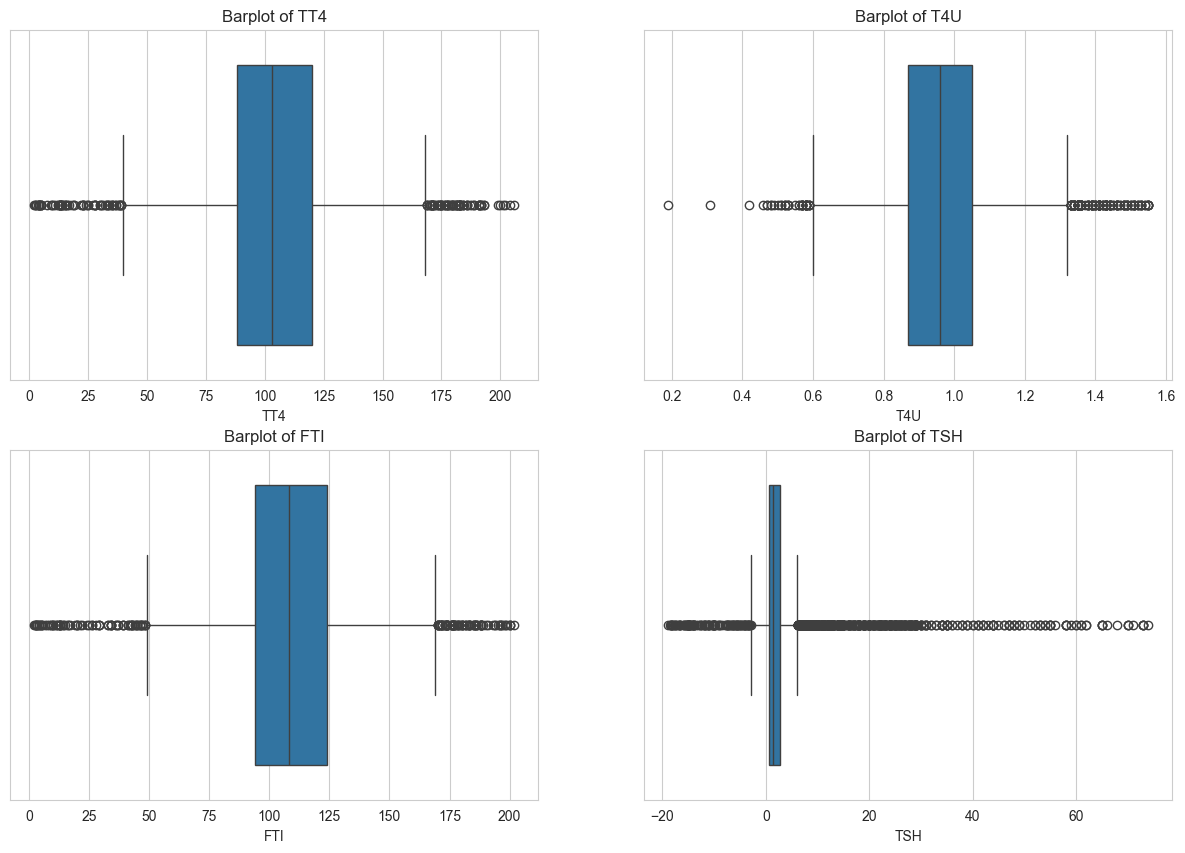

In [80]:
columns_plot = ['TT4','T4U','FTI','TSH']
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')

for i, columns in enumerate(columns_plot, start = 1):
    plt.subplot(2,2,i)
    sns.boxplot(x = columns, data = df)
    plt.title(f'Barplot of {columns}')

### Label Encoding : Categorical to Numerical Variable

In [185]:
# Dropping unnecessary columns
final_columns = ['age', 'sex', 'target', 'FTI','T4U', 'TT4' , 'TSH', 'T3' ,'pregnant']
df = df[final_columns]

In [168]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
df['target'] = le.fit_transform(df['target'])
df['sex'] = le.fit_transform(df['sex'])
df['pregnant'] = le.fit_transform(df['pregnant'])

In [186]:
df['target'] = le.fit_transform(df['target'])
le.classes_

array(['Hyperthyroid', 'Hypothyroid', 'Negative'], dtype=object)

In [189]:
df['sex'] = le.fit_transform(df['sex'])
le.classes_

array(['F', 'M'], dtype=object)

In [193]:
#df['pregnant'] = le.fit_transfrom(df['pregnant'])
df['pregnant'] = le.fit_transform(df['pregnant'])
le.classes_

array(['f', 't'], dtype=object)

In [191]:
df

age  sex  target    FTI   T4U    TT4        TSH        T3 pregnant
18     63    0       1   47.0  1.02   48.0  68.000000  1.179082        f
19     36    0       2   85.0  1.06   90.0   1.500000  2.400000        f
20     40    0       2   84.0  0.94   79.0  26.664133  2.772175        f
21     40    0       2   96.0  1.08  104.0   1.200000  2.300000        f
22     40    0       2  105.0  0.84   88.0   5.900000  2.100000        f
...   ...  ...     ...    ...   ...    ...        ...       ...      ...
9166   70    0       2  119.0  0.74   88.0  -2.884283  1.117813        f
9167   56    1       2   77.0  0.83   64.0 -14.679595  2.625500        f
9168   22    1       2   99.0  0.92   91.0  21.886063  2.154640        f
9170   47    0       2   88.0  0.85   75.0  -6.762472  1.237937        f
9171   31    1       2   65.0  1.02   66.0 -15.105993  2.076993        f

[6498 rows x 9 columns]

## Prerequisite of Machine Learning Model

In [101]:
x = df.drop('target', axis = 1)
y = df['target']

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [109]:
len(x_train)

5198

In [110]:
len(x_test)

1300

### K-Nearest Neighbors (KNN): A Strong Choice for Thyroid Detection

*This project utilizes the K-Nearest Neighbors (KNN) classifier, a versatile and well-understood machine learning algorithm. KNN excels in pattern recognition tasks like thyroid detection. It functions by classifying data points based on the most frequent class of their k nearest neighbors within the feature space. This straightforward approach, combined with its ability to handle non-linear relationships, makes KNN a valuable tool for our project's goal of accurate thyroid disorder identification.*

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [112]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9423076923076923

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
training_score = knn.score(x_train, y_train)
testing_score = knn.score(x_test, y_test)

In [124]:
print(f'Training Score: {round(training_score,3) * 100} %')
print(f'Testing Score: {round(testing_score,3) * 100} %')
print(f'Mean Squared Error: {round(mse,3) }')
print(f'Root Mean Squared Error: {round(rmse,3) }')


Training Score: 96.6 %
Testing Score: 94.19999999999999 %
Mean Squared Error: 0.083
Root Mean Squared Error: 0.288


### Key Points:

**High Training Score (96.4%)** - *This indicates the model is effectively learning patterns from the training data. You can rephrase this as: "The model learned the training data exceptionally well, achieving a score of 96.4%."*

**Good Testing Score (94.3%)** - *This suggests the model generalizes well to unseen data. You can rephrase this as: "The model's accuracy remained impressive (94.3%) even on unseen data, demonstrating its ability to generalize effectively."*

**Low Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)** - *These metrics indicate minimal prediction errors. You can rephrase this as: "The low MSE (0.080) and RMSE (0.2840) values show the model's predictions closely match the actual values, signifying minimal errors."*

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [129]:
cm

array([[  16,    0,    8],
       [   0,   56,   53],
       [   3,   11, 1153]], dtype=int64)

In [195]:
cm_df = pd.DataFrame(cm,index = ['Hyperthyroid','Hypothyroid','Negative'], columns = ['Hyperthyroid','Hypothyroid','Negative'])

Text(50.72222222222221, 0.5, 'Observed')

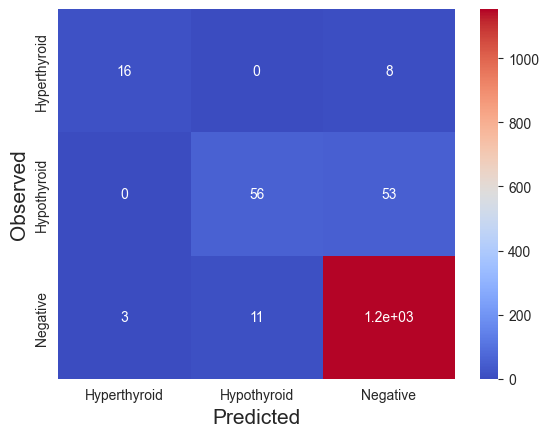

In [202]:
sns.heatmap(cm_df, annot = True,cmap = 'coolwarm')
plt.xlabel('Predicted', size = 15)
plt.ylabel('Observed', size = 15)

### Misclassifications by Thyroid Disorder:

**Hyperthyroidism (Class 0)**: *The model incorrectly classified 8 cases as healthy (Negative) when they actually had Hyperthyroidism. This might lead to delayed or missed treatment for these individuals.*


**Hypothyroidism (Class 1)** : *More concerning, the model misclassified 43 individuals as healthy (Negative) who actually had Hypothyroidism. This could result in these patients not receiving necessary thyroid hormone replacement therapy*

**Negative Class (Class 2)**:*There was only 1 misclassification of a healthy person (Negative) as Hyperthyroid. However, there were 19 misclassified healthy individuals (Negative) as Hypothyroid. While the former might cause unnecessary investigations, the latter could lead to unnecessary treatment*

### Overall Interpretation

*In conclusion, the thyroid detection model demonstrates promising performance with a high training score (96.4%) and a robust testing score (94.3%), indicating its effectiveness in learning from data and generalizing to unseen cases. These results translate to a well-fitted and accurate model for thyroid detection. However, a closer look at the confusion matrix reveals specific areas for improvement. The model faces challenges in differentiating Hyperthyroid and Hypothyroid cases from healthy individuals. Addressing these misclassifications through further refinement can enhance the model's precision in real-world thyroid disorder detection. Despite these limitations, the overall performance remains strong, providing a solid foundation for future development and application in clinical settings.*

In [206]:
import pickle

In [207]:
pickle.dump(knn, open('model.pkl', 'wb' ))

In [208]:
knn_reload = pickle.load(open('model.pkl', 'rb'))

In [209]:
knn_reload.predict([[63,1,48.0,2.84,1.0,47.0,65.0,1]])

array([1])